# First homework

## Direct methods for the solution of Linear Systems

I begin by importing all the neccessary packages for this exercise, which are `numpy` for matrix managing, `matplotlib.pyplot` for plotting and visualization and `scipy.linalg` for creating the Hilbert matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

I have to define a function that is able to construct the test problem, so that computes the exact solution starting from an `x_true`. This will enable me to measure the relative error produced by the used solving algorithms.

In [2]:
def compute_test_problem(A, x_true):
    return A@x_true

Moreover, I am asked to compute the condition number of the $A$ matrix both with the 2-norm and the $\infty$-norm. This function will be used later in the notebook to discuss if a matrix is ill-conditioned or well-conditioned. The condition number of the matrix measures the ratio of the maximum relative stretching to the maximum relative shrinking that matrix does to any non zero vectors.

In [3]:
def compute_condition_number(A):
    cond_numb_2 = np.linalg.cond(A, p=2)
    cond_numb_inf = np.linalg.cond(A, p=np.inf)
    return (cond_numb_2, cond_numb_inf)

In the following code I define a solver, that given a matrix and the vector $y$ solves the linear system using the numpy function `np.linalg.solve()`.

In [4]:
def solver(A,y):
    return np.linalg.solve(A,y)

The relative error between the computed solution and the true solution of the test problem defined at the beginning of the homework is a good indicator of the effectiveness of the algorithm. 

The relative error is defined as 
$$E_{rel}(x_{true},x_{sol}) = \frac{\|x_{true}-x_{sol}\|_2}{\|x_{true}\|_2}$$

In [5]:
def relative_error(x_true, x_solved):
    return np.linalg.norm(x_true-x_solved, 2) / np.linalg.norm(x_true, 2)

The following function plots the relative errors done by the solving algorithm and the condition number in both 2-norm and $\infty$-norm as a function of $n$.

In [6]:
def plot(rel_errors, cond_nums_2, cond_nums_inf, n_range):

    plt.figure(figsize=(11,5))
    plt.subplot(1,2,1)
    plt.plot(n_range,rel_errors)
    plt.grid()
    plt.xticks(n_range)
    plt.title('Relative error')
    plt.xlabel('$n$')
    plt.ylabel('Relative error')

    plt.subplot(1,2,2)
    plt.semilogy(n_range, cond_nums_2)
    plt.semilogy(n_range, cond_nums_inf)
    plt.minorticks_off()
    plt.xticks(n_range)
    plt.grid()
    plt.title('Condition number of the matrix')
    plt.xlabel('$n$')
    plt.ylabel('Condition number')
    plt.legend(['2-norm','inf-norm'])
    plt.show()

**Final function**

The function `homework_1()` uses all of the previously defined functions to plot the relative error and the condition numbers with 2-norm and $\infty$-norm given the matrix. In particular the function takes the name of the matrix to construct as a string and the dimensions of the matrices to test.

In [7]:
def homework_1(matrix, ns):

    cond_nums_2 = []
    cond_nums_inf = []
    rel_errs = []
    for i in ns:
        if matrix == 'random':
            A = np.random.rand(i,i)
        elif matrix == 'Vandermonde':
            #vector w.r.t- which the matrix was created
            v = np.array([i for i in range(1,i+1)])
            A = np.vander(v ,i)
        elif matrix == 'Hilbert':
            A = scipy.linalg.hilbert(i)
        x_true = np.ones((i, ))
        y_true = compute_test_problem(A, x_true)
        cond_numb_2, cond_numb_inf = compute_condition_number(A)
        cond_nums_2.append(cond_numb_2)
        cond_nums_inf.append(cond_numb_inf)
        x_solved = solver(A, y_true)
        rel_err = relative_error(x_true, x_solved)
        rel_errs.append(rel_err)
    plot(rel_errs, cond_nums_2, cond_nums_inf, ns)


**Test with random matrix**

From the plotted graphs can be evicted that the random matrix is well conditioned, as its condition number doesn't grow exponentially with the growing of the dimension of the matrix. Moreover, the relative error is very small, of the order of $e^{-14}$.

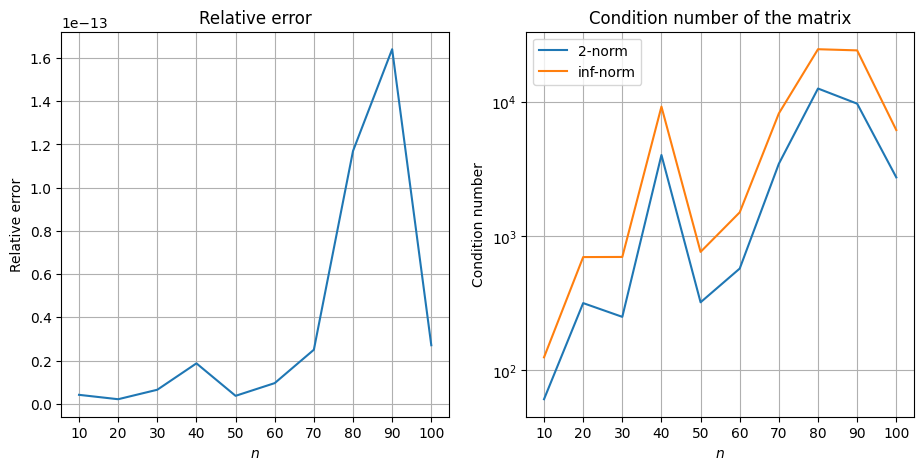

In [8]:
homework_1('random', [i for i in range(10,101,10)])

**Test with Vandermonde matrix**

The Vandermonde matrix is ill-conditioned. From the figure can be seen that the condition number grows exponentially with the dimension of the matrix. The computed relative error is of the order of $e^{-7}$, so it is $5$ orders of magnitude greater than the relative error of the random matrix.

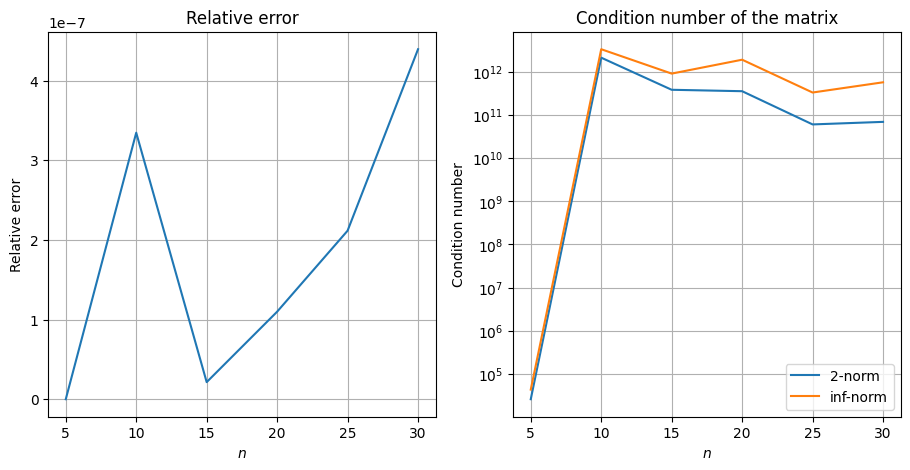

In [9]:
homework_1('Vandermonde', [i for i in range(5,31,5)])

**Test with the Hilbert matrix**

The Hilbert matrix is also ill-conditioned. This can be concluded by looking at the plotted figures, because the condition number of the Hilbert matrix grows exponentially with the matrix dimension. It can also be observed that the relative error is much larger than the errors done by the same stable algorithm `np.linalg.solve()` with the random and Vandermonde matrices.

In all three cases the condition numbers for both the 2 and $\infty$ norms were similar in their evolving and can differ only by a fixed factor. This is a direct consequence of the equivalence of norms.

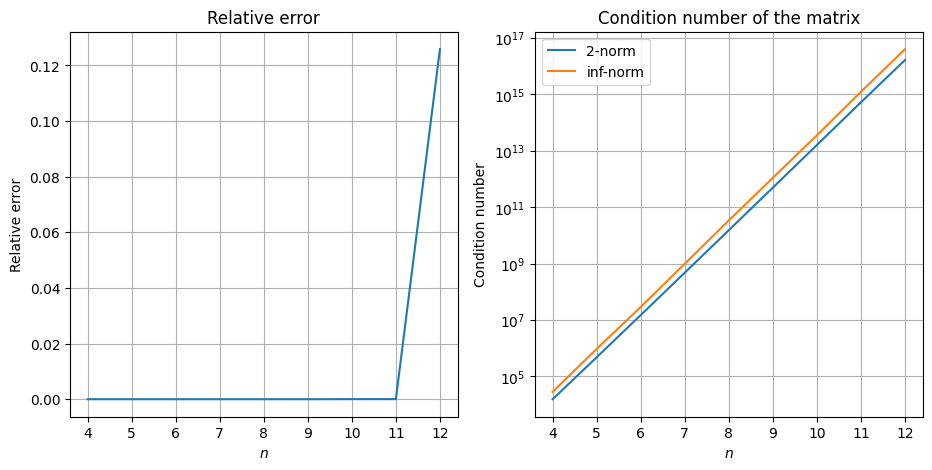

In [10]:
homework_1('Hilbert', [i for i in range(4,13)])

## Floating point arithmetic

**Machine precision**

In the following code snippet I will compute the machine precision $\epsilon$, which is defined as the smallest floating point number, such that $fl(1+\epsilon) > 1$.

In [11]:
def compute_epsilon():
    eps = 0.5
    while 1 + eps > 1:
        eps /= 2
    return eps * 2

print('The machine precision \u03B5 is:', compute_epsilon())

The machine precision ε is: 2.220446049250313e-16


Alternatively the machine precision $\epsilon$ can be also computed with the formula we have seen in class, which is $\epsilon = \beta^{1-t}$, where $t$ is the precision of the considered floating point system. In this case $t=53$.

In [12]:
print(f'The machine precision \u03B5 is: {2**(1-53)}.')

The machine precision ε is: 2.220446049250313e-16.


An important note has to be done about the starting epsilon value. The fact that I started from $0.5$ was not done by chance. It is important that the starting value is a decimal value that has an exact representation in the binary system, like $2, 1, 0.5$ and so on. Moreover, the standard floating-point system (IEEE 754) represents numbers as sums of powers of 2. The floating point system in the computers is $F(2,53,-1024,1023)$, considering double precision. This guarantees that by halving the value we always obtain a value precisely represented in the system, obtaining the correctness of the procedure, that would have been otherwise wrong, as shown in the second example. 

In [13]:
def compute_epsilon():
    eps = 0.1
    while 1 + eps > 1:
        eps /= 2
    return eps * 2

print('The machine precision \u03B5 is:', compute_epsilon())

The machine precision ε is: 1.7763568394002506e-16


**Sequence that converges to $e$**

In the code below I compute the sequence $a_n=(1+\frac{1}{n} )^n$, for different values of $n$. I will also compare the obtained vaues with the nepero number $e$ and plot the error for growing values of $n$.

The nepero number in the machine is:  2.718281828459045
+------------+-------------+---------+
|          n |       Error |   Value |
+============+=============+=========+
|      1     | 0.718282    | 2       |
+------------+-------------+---------+
|     10     | 0.124539    | 2.59374 |
+------------+-------------+---------+
|    100     | 0.013468    | 2.70481 |
+------------+-------------+---------+
|   1000     | 0.0013579   | 2.71692 |
+------------+-------------+---------+
| 100000     | 1.35913e-05 | 2.71827 |
+------------+-------------+---------+
|      1e+06 | 1.35936e-06 | 2.71828 |
+------------+-------------+---------+
|      1e+07 | 1.34327e-07 | 2.71828 |
+------------+-------------+---------+
|      1e+10 | 2.24776e-07 | 2.71828 |
+------------+-------------+---------+
|      1e+13 | 0.00217179  | 2.71611 |
+------------+-------------+---------+
|      1e+15 | 0.316753    | 3.03504 |
+------------+-------------+---------+
|      1e+17 | 1.71828     | 1       |
+-------

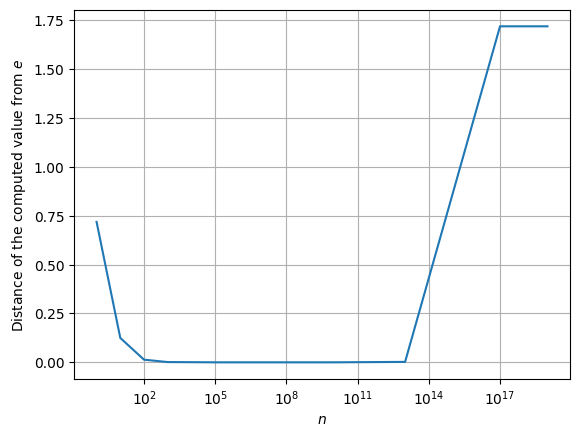

In [14]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

def sequence(n):
    return (1+1/n)**n

def plot_errs(ns, errs):
    plt.plot(ns, errs)
    plt.xlabel('$n$')
    plt.ylabel('Distance of the computed value from $e$')
    plt.grid()
    plt.xscale('log')
    plt.show()

def compute_sequence_errors(ns):
    errors = []
    for i in ns:
        value = sequence(i)
        err = abs(math.e - value)
        errors.append(err)
    plot_errs(ns, errors)

print("The nepero number in the machine is: ", math.e)
ns = [1, 10, 100, 1e3,1e5, 1e6, 1e7, 1e10, 1e13, 1e15, 1e17, 1e19]
headers = [r'n', 'Error', 'Value']
table = []
for i, n in enumerate(ns):
    computed = sequence(n)
    err = abs(math.e - computed)
    table.append([n, err, computed])
print(tabulate(table, headers=headers, tablefmt="grid"))

compute_sequence_errors([1,10,100,1000,1e5, 1e8, 1e10, 1e13, 1e17, 1e19])

From the plotted graph the behavior of the error is evident, it goes to zero for increasing values of $n$, but then if we consider very large values the computed value becomes always $1.$ This is a direct consequence of the floating point system in which the numbers are represented inside machines, because the term $\frac{1}{n}$ for large $n$ is lower than the machine precision and so it effectively becomes $0$ and so $(1+0)^n = 1$.

**Matrix rank and eigenvalues**

In [15]:
import numpy as np

A = [[4,2],[1,3]]
B = [[4,2],[2,1]]

print("The rank of the matrix A:", np.linalg.matrix_rank(A))
print("The rank of the matrix B:", np.linalg.matrix_rank(B))

print('Eigenvalues of matrix A:', np.linalg.eigvals(A))
print('Eigenvalues of matrix B:', np.linalg.eigvals(B))


The rank of the matrix A: 2
The rank of the matrix B: 1
Eigenvalues of matrix A: [5. 2.]
Eigenvalues of matrix B: [5. 0.]


$A$ is a full-rank matrix, while $B$ is a matrix of rank one, because the two vectors of the matrix $B$ are linearly dependent as $(4,2) = (2,1) * 2$. $B$ has a null eigenvalue, which is characteristic for non full-rank matrices, as full-rank squared matrices have all its eigenvalues different from zero. In particular the rank of a matrix follows the following disequality $rk(A) \le n - \lambda_a.$

This follows from the **rank-nullity theorem**, stating that the dimension of a square matrix $A$ is $n = rk(A) + nullity(A)$. So, if we consider the algebraic multplicity of $0$ $\lambda_a$ then its geometric multiplicity is $\lambda_g \le \lambda_a,$ which means that $rk(A) \ge n - \lambda_a(0).$ From this it also follows that a matrix is of full rank if the matrix doesn't have $0$ as its eigenvalue.

Some examples of non symmetric matrices:

In [16]:
examples = {'C' : [[5,7],[2,6]],'E': [[1,1,1],[2,2,2],[0,0,0]], 'G': [[1,2,3,5],[3,8,9,2],[5,2,1,4],[9,6,3,7]]}

for i in examples:
    print(f"The rank of the matrix {i} is {np.linalg.matrix_rank(examples[i])} and the eigenvalues are {np.linalg.eigvals(examples[i])}")

The rank of the matrix C is 2 and the eigenvalues are [1.72508278 9.27491722]
The rank of the matrix E is 1 and the eigenvalues are [0. 3. 0.]
The rank of the matrix G is 4 and the eigenvalues are [17.65211418+0.j         -3.96632247+0.j          1.65710415+0.95415859j
  1.65710415-0.95415859j]


Some examples for symmetric matrices:

In [17]:
examples = {'C' : [[2,4],[4,8]], 'E': [[1,2,3],[2,5,6],[3,6,9]], 'G': [[1,2,3],[4,5,6],[7,8,9]]}
for i in examples:
    print(f"The rank of the matrix {i} is {np.linalg.matrix_rank(examples[i])} and the eigenvalues are {np.linalg.eigvals(examples[i])}")

The rank of the matrix C is 1 and the eigenvalues are [ 0. 10.]
The rank of the matrix E is 2 and the eigenvalues are [1.43007353e+01 5.71247076e-17 6.99264746e-01]
The rank of the matrix G is 2 and the eigenvalues are [ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]


The last examples hide some issues, because the rank computed by `matrix_rank` is non maximal even if the matrix doesn't have $0$ as its eigenvalue. That's because in the function `matrix_rank` values smaller then a tolerance threshold are considered to be zero and so the rank becomes $2$. By decreasing the tolerance that the method considers to become smaller than the smallest eigenvalues, the rank becomes $3$, that is in fact maximal.

In [18]:
examples = {'E': [[1,2,3],[2,5,6],[3,6,9]], 'G': [[1,2,3],[4,5,6],[7,8,9]]}
for i in examples:
    print(f"The rank of the matrix {i} is {np.linalg.matrix_rank(examples[i], tol=1e-17)} and the eigenvalues are {np.linalg.eigvals(examples[i])}")

The rank of the matrix E is 3 and the eigenvalues are [1.43007353e+01 5.71247076e-17 6.99264746e-01]
The rank of the matrix G is 3 and the eigenvalues are [ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]
